# Import Packages

In [31]:
import os
import pandas as pd
import numpy as np

# Import Data

In [2]:
home_dir = os.getcwd()
data_preprocessed_dir = home_dir + '\data_preprocessed'
print(home_dir)
print(data_preprocessed_dir)

df_merged = pd.read_csv(data_preprocessed_dir + '/input_data_merged.csv')

C:\dev\predicting-sales-data\warm-up
C:\dev\predicting-sales-data\warm-up\data_preprocessed


# Utility Functions

In [3]:
def plot_forecasts(df_hist, df_pred, title=None, figsize=(15, 3)):

    df_combined = pd.concat([df_hist, df_pred])

    ax = df_combined.plot(x='Date', y='Weekly_Sales',
                          figsize=figsize, color='orange', legend=False)
    df_hist.plot(x='Date', y='Weekly_Sales', ax=ax, legend=False, title=title)

# Benchmark Model

In [119]:
def forecast_benchmark(df, n_iterations=28):
    # df: df with column date and weekly sales
    # n_int: int with number of pred
    # returns df with dates and predicted weekly sales

    df = df.assign(year=pd.DatetimeIndex(df['Date']).year.tolist(),
                   week=pd.DatetimeIndex(df['Date']).weekofyear.tolist())

    avg_year = pd.pivot_table(df, values='Weekly_Sales', index=[
                              'week'], aggfunc=np.mean)
    avg_year.reset_index(level=avg_year.index.names, inplace=True)

    last_date = pd.DatetimeIndex(df['Date'].tail(1))

    pred_date = []
    pred_sale = []

    for i in range(1, 1+n_iterations):
        date_i = last_date + pd.DateOffset(weeks=i)
        week_i = int(date_i.weekofyear.values)
        avg_year_i = avg_year.loc[avg_year['week']
                                  == week_i]['Weekly_Sales'].values

        pred_date.extend(date_i.format())
        pred_sale.extend(avg_year_i)

    return pd.DataFrame({'Date': pred_date, 'Weekly_Sales': pred_sale})

In [120]:
# Sample n random Stores
store_i = df_merged['Store'].drop_duplicates().sample(
    n=5, random_state=1).values.tolist()

# Data Aggregation
df = df_merged[['Store', 'Dept', 'Date', 'Weekly_Sales']]
df = pd.pivot_table(df, values='Weekly_Sales', index=[
                    'Store', 'Date'], aggfunc=np.sum)
df.reset_index(level=df.index.names, inplace=True)

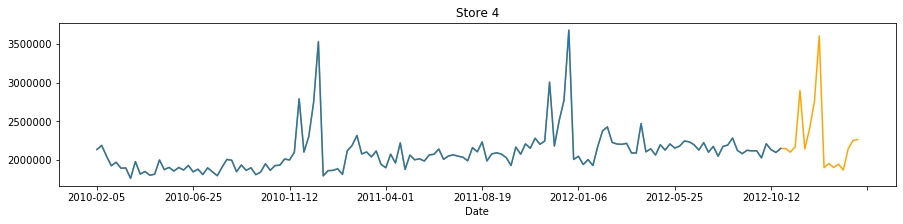

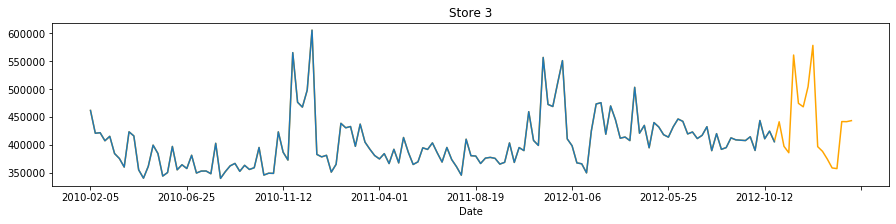

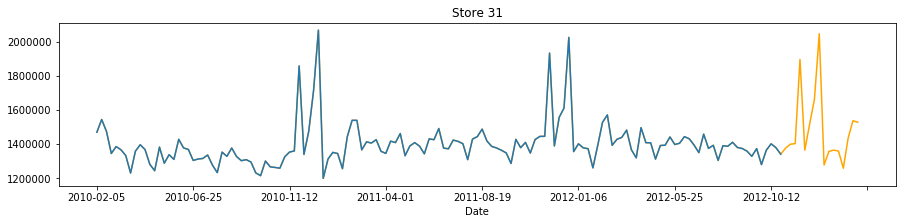

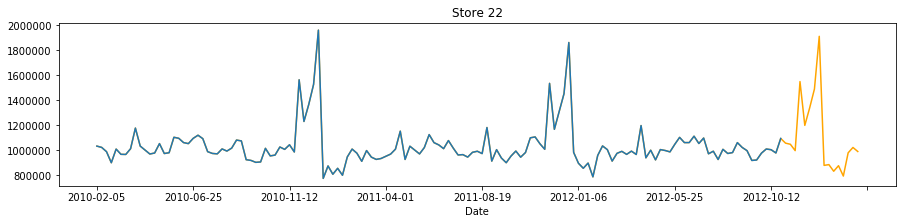

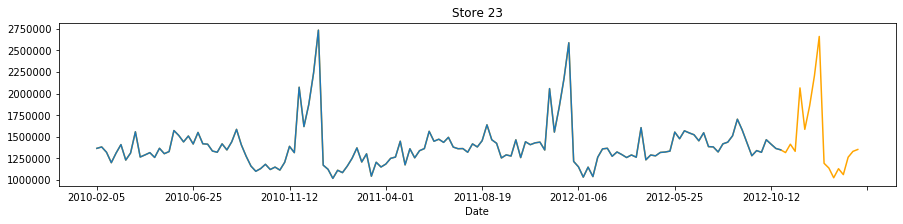

In [122]:
# Plot Forecasts
for s in store_i:
    df_s = df.loc[df['Store'] == s]
    fc = forecast_benchmark(df_s, n_iterations=16)
    plot_forecasts(df_s, fc, title=f'Store {s}', figsize=(15, 3))